# Feature engineering:
- It is the process of creating, transforming or selecting variables from raw data so that machine learning models can learn patterns better. That is turning raw data into useful signals for models.
- We use feature engineering because:
  1) Raw data are messy, incomplete or not meaningful to models.
  2) Good feature can improve accuracy of the models than changing algorithms.
- Feature Engineering includes:
  1) Handling missing values
  2) Encoding the variables
  3) Feature scaling
  4) Creating new feature
  5) Removing useless and noisy feature
  6) Handling outliers
  7) Dealing with class imbalance.

# Step 1: Missing values
- Missing values occur in data set when some information is missing or is not stored for a variable. There are 3 mechanisms to it for the values to be missing:
- **Missing Completely at random(MCAR):**
  - It is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. That means if the data is MCAR, the missing values are randomly distributed throughout the data set and there is no systematic reason for the data being missing.
  - For example: In a survey about the prevalence of a disease, the data that is missing can be MCAR if the survey participants are taken at random and their missing responses are not related to their disease status or any other variables measured in the survey.


- **Missing at random (MAR):**
  - It is a type of missing data mechanism where the probability of a value being missing depends on the observed data but not on the missing data itself. That is the data is MAR if the missing values are systematically related to the observed data, but not to the missing data.
  - for example: we are collecting incmoe data from the group of people but some choose not to report the income. This can be due to the age or gender of the person but not on the income level then we can say that the data is missing at random.


- **Missing data not at random(MNAR):**
  - Here the data is of missing values depends on the value of missing data itself. That is the data is MNAR the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.
  - For example: We are collecting data on the income and job satisfaction of employee in a company. If employees who are less satisfied with their jobs are likely to refuse to report their income, when the data is not missing at random. In this case missingness is dependent on job satisfaction, which is not directly observed or measured.

In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [ ]:
df.head()

In [ ]:
#checking the missing values:
df.isnull().sum()

## Method 1: Remove the missing values
- Here we can remove the entire row from the data set that has the missing value in it. but there is one problem to it that is we will face with data lose.
- That is if the count of missing value is to large in this case the number of missing values we have is 688 for deck and if we remove it, out data set will be of 182 rows only from 891 which is more than half of the data gone which may lead to wrong predictions,
- This method can only work when we have very less data missing and we can afford to remove that row completely.
- Now here we can also follow column wise data deletion but again here we need to be careful that if that particular column is not important for prediction or some other variables in the data.
- If the column is not important than we can use dropna(axis = 1, 'column_name')
- Here we can consider the age as MAR as the value can be empty because the people might have not reported their age and deck can be MNAR as the titanic sank so we cannot confirm the deck of the prople hence its not measureable and embark can be MCAR as there is no relation between any variable.

In [ ]:
## One of the way to remove the missing values is to delete the entire row that has the missing value in it.
df.shape

In [ ]:
df.dropna().shape

In [ ]:
df.drop('deck', axis=1)
# to make this operation permanent that is for furthur use, you want to see the data set without the deck column then we can use 'inplace = True'

In [ ]:
df.shape

## Method 2: Data Imputation
- Mean value imputation:
   - Here if the data is symmetric or bell shaped or normal data then we can use the mean to fill the missing values which will prevent us from deleting the row completely hence no loss of data will be there.
- Median value imputation
   - If we have a right skewed or the left skewed data, we can use the median as there will be outliers present and mean is sensitive to the outliers as its one of the biggest disadvantage of the mean.
- Mode value imputation
  - Here for mode value imputation, we can perform it on categorical data or when the values are MCAR. Here we can take any value from that row and replace the missing value with it as it does not create any impact on other variables.

In [ ]:
sns.histplot(df['age'], kde = True)
# Here we can see that the data is somewhat symetric.

In [ ]:
df['mean_age'] = df['age'].fillna(df['age'].mean())

In [ ]:
df[['age','mean_age']]

In [ ]:
df['Median_age'] = df['age'].fillna(df['age'].median())

In [ ]:
df[['Median_age','age']]

In [ ]:
df[df['embarked'].isnull()]

In [ ]:
df['embarked'].unique()

In [ ]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [ ]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [ ]:
df[['embarked','embarked_mode']]

# Step 2: Handling Imbalanced dataset
- Lets say we have a binary classification dataset with 1000 datapoints of yes or no.
- Over here if we have 900 yes and 100 no then we can say that the data is imbalanced and its biased towards the yes data point.
- so we try to handle this imbalanced data using 2 technique: Upsampling and Downsampling

## Method 1: Up sampling
- It is a technique used to handle imbalanced datasets by increasing the number of samples in the minority class so that the classes have similar count.
- Here instead of collecting new data, we duplicate the data of the minority class by making `replace = True`.
- Below i have shown a example where i have first created a data frame where we have targets one with 900 zero's and one with 100 ones so here we upsample the one's.
- The main disadvantage of upsampling is that the data is duplicated which will affect the model when you train it as it will cause overfitting.

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(123)

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [ ]:
n_class_0, n_class_1

In [ ]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale = 1, size = n_class_0),
    'feature_2': np.random.normal(loc=0, scale = 1, size = n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale = 1, size = n_class_1),
    'feature_2': np.random.normal(loc=0, scale = 1, size = n_class_1),
    'target': [1] * n_class_1
})
# Here loc = 0 means that that the mean is 0 and the scale =1 means that standard deviation is 1 and the data is normally distributed.

In [ ]:
df = pd.concat([class_0,class_1]).reset_index(drop = True)
# Here we have concatinated the 2 data sets into 1 and used a reset index.
# reset index helps give the new index for the value in the combined data instead of repeting the index.
# Here drop = true means that we remove the index column where the index is repeating.

In [ ]:
df.tail()

In [ ]:
df['target'].value_counts()

In [ ]:
## upsampling:
df_minor = df[df['target'] == 1]
df_major = df[df['target'] == 0]

In [ ]:
from sklearn.utils import resample
df_minor_upsample = resample(df_minor, 
                             replace = True, 
                             n_samples = len(df_major), 
                             random_state = 42)
# Here resample is a sublibrary where it helps us to upsample or down sample the data using the parameters that it has.
# Here we want to upsample so we use replace = true where the data from the minority data is copied and duplicated to make the data balanced.
# How much data we want is given by n_sample.
# And to make the random data fixed, we use random_state.

In [ ]:
df_minor_upsample.shape

In [ ]:
df_minor_upsample.head()

In [ ]:
df_upsampled = pd.concat([df_major,df_minor_upsample])

In [ ]:
df_upsampled['target'].value_counts()

## Method 2: Down sampling
- It is a technique to handle imbalanced dataset by reducing the number of samples in the majority class so that all classes have similar counts.
- Here instead of adding the data, we remove the data.
- Here the replace will be false as we dont want more data.
- Here the major disadvantage is the data loss hence it can create underfitting.

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(123)

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [ ]:
n_class_0, n_class_1

In [ ]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale = 1, size = n_class_0),
    'feature_2': np.random.normal(loc=0, scale = 1, size = n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale = 1, size = n_class_1),
    'feature_2': np.random.normal(loc=0, scale = 1, size = n_class_1),
    'target': [1] * n_class_1
})

In [ ]:
df = pd.concat([class_0,class_1]).reset_index(drop = True)

In [ ]:
df.tail()

In [ ]:
df['target'].value_counts()

In [ ]:
## down sampling:
df_minor = df[df['target'] == 1]
df_major = df[df['target'] == 0]

In [ ]:
from sklearn.utils import resample
df_major_downsample = resample(df_major, 
                             replace = False, 
                             n_samples = len(df_minor), 
                             random_state = 42)
# Here the replace will be false.

In [ ]:
df_major_downsample.shape

In [ ]:
df_downsampled = pd.concat([df_major_downsample, df_minor])

In [ ]:
df_downsampled['target'].value_counts()

# Step 3: SMOTE
- Now the main disadvantage of up and down sampling was that the data point that were created were just a copy and hence the precision of the model may get affected due to this.
- To solve this problem, we have a technique called as SMOTE which stands for: **Synthetic Minority Over Sampling Technique**
- It is the method to handle imbalanced data by creating new synthetic samples for the minority class instead of just duplicating existing ones.
- We use SMOTE to:
  1) Avoid overfitting caused by the duplicate elements
  2) Helps models learn better decision boundaries
  3) Improves recall and F-1 score for majority class
  4) makes dataset balanced without losing majority data.
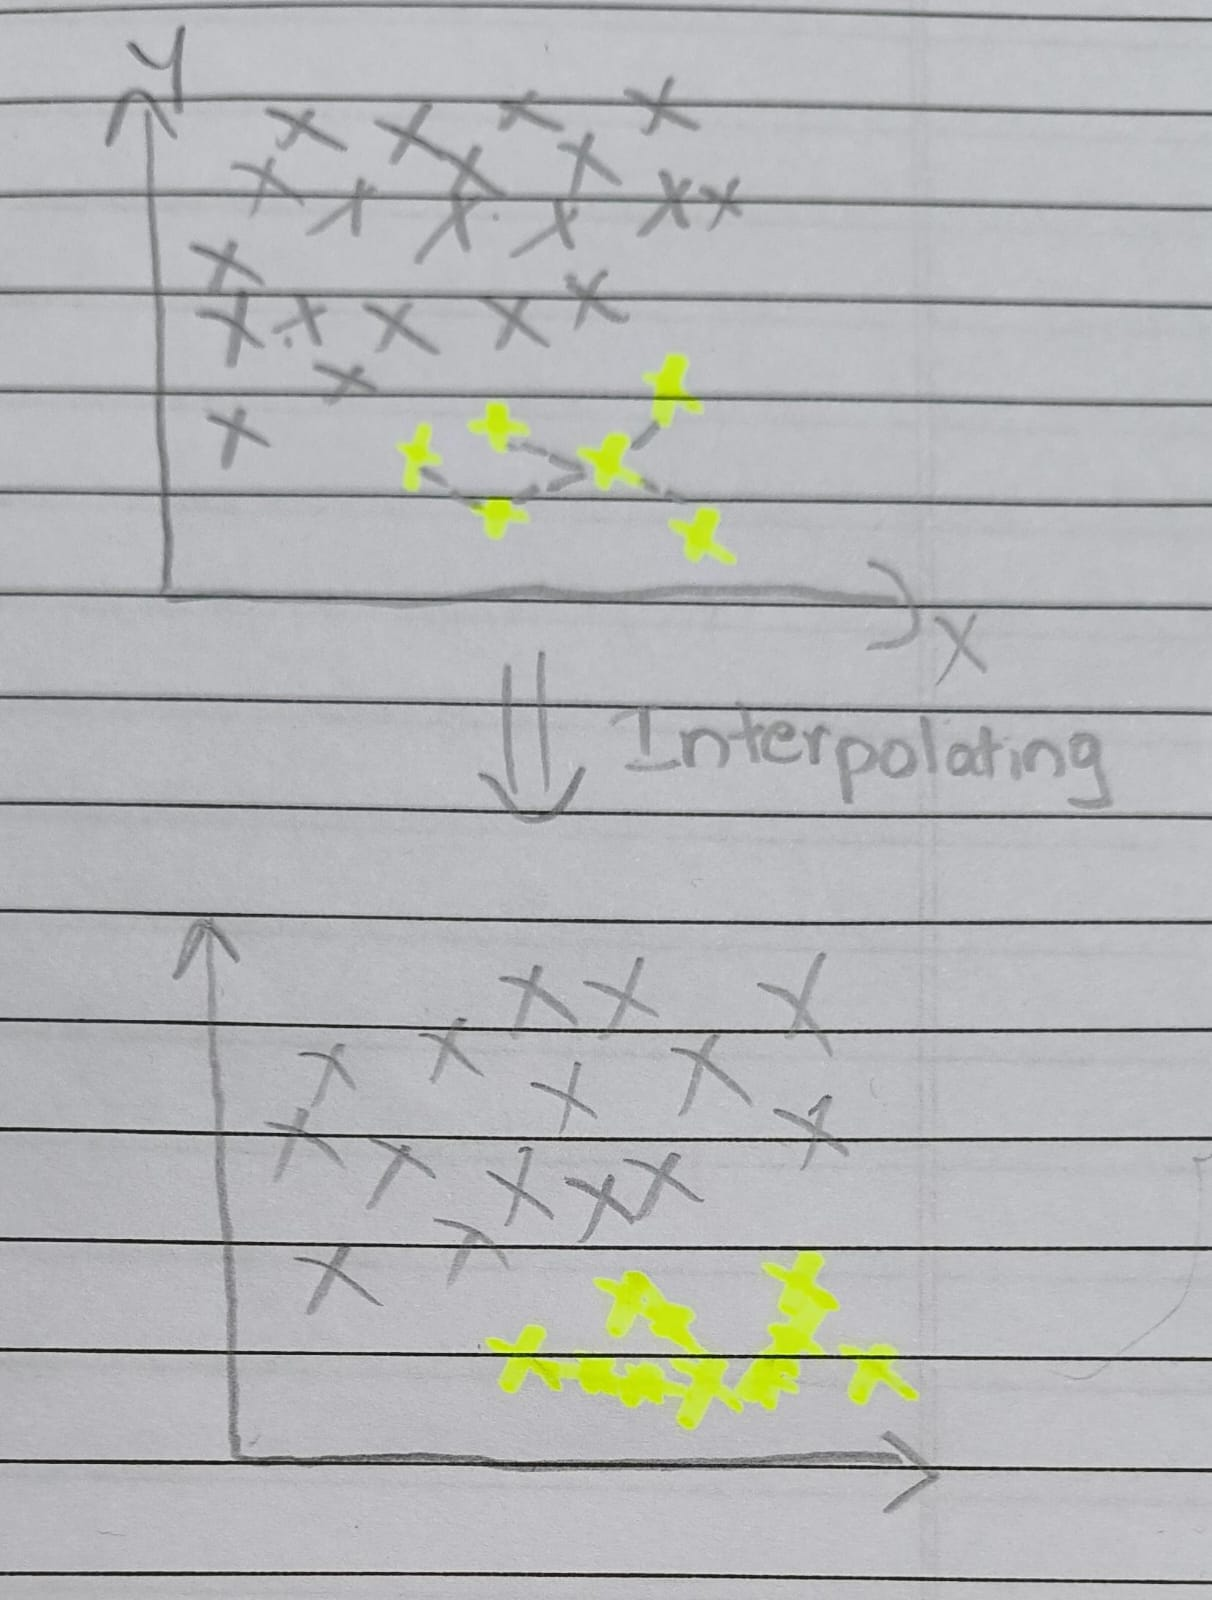
- Here the image above shows the working of the SMOTE.
- In SMOTE, the values are syntheticaly created between two nearest point so that the values become balanced with the majority class.

In [ ]:
from sklearn.datasets import make_classification
# Here make classification is used to make synthetic data.
# It has n_samples which helps in creating row wise data.
# it has n_features which tells us the number of columns that a data point will have
#Then we have n_redundant which show the number of feature that are linear combination of informative feature.

In [ ]:
x,y = make_classification(n_samples = 1000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1,
                   weights = [0.90], random_state = 12)
print(x.shape)
print(y.shape)

In [ ]:
import pandas as pd
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns = ['target'])
print(df1)
print(df2)

In [ ]:
final_df = pd.concat([df1,df2],axis = 1)
final_df.head()

In [ ]:
final_df['target'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c = final_df['target'])
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [ ]:
x.shape

In [ ]:
print(len(y[y == 0]))
print(len(y[y == 1]))

In [ ]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns = ['target'])
oversample_df = pd.concat([df1,df2],axis = 1)

In [ ]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c = oversample_df['target'])
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

# Step 4: Handling Outliers
- For Handling Outliers, we use the concept of 5 number summary and Box plot.
- 5 number summary include spread and center of your data without being affected by extreme values.
- 5 number summary include minimum, q1(25 percentile), median(q2, 50th percentile), q3(75th percentile), maximum.
- This helps us detect that outliers which are far away from the data points with the help of IQR which stands for inter quatile range.
- The formula for IQR is Q3 - Q1.
- With this IQR, we can calculate the upper fence and lower fence.
- The formula for upper and lower fence is: Upper = Q3 +IQR(1.5) and Lower = Q1 - 1.5(IQR)
- any value beyond them will be considered as outliers.
- The formula to calculate the Q1(25th percentile) is: (25/100)*(n+1)
- The formula to calculate Q3(75th percentile) is (75/100)*(n+1)

In [ ]:
import numpy as np

In [ ]:
lst_marks = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,q1,median,q3,maximum = np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])
# Here i have used the quantile function from the numpy library to find out the 5 number summary.
# Here 0 means the minimum value. 0.25 means the Q1, 0.50 means median. 0.75 means Q3 and 1 means the maximum.

In [ ]:
print(minimum,q1,median,q3,maximum)

In [ ]:
iqr = q3 - q1
print(iqr)

In [ ]:
lower_fence = q1 - 1.5*(iqr)
upper_fence = q3 + 1.5*(iqr)

In [ ]:
print(lower_fence)

In [ ]:
print(upper_fence)

## Box Plot
- To view the outliers, we can use the box plot, which is a graphical representation of the 5 number summary.
- The image below shows the box plots detail.
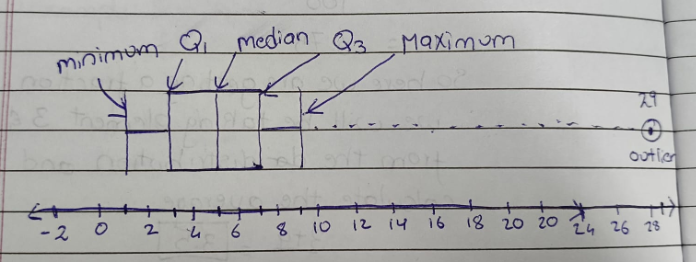

In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(lst_marks)

In [ ]:
lst_marks = [-20,-30,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]
sns.boxplot(lst_marks)

# Step 5: Data Encoding
- Data Encoding is the process of converting categorical(Text or labels) data into numerical form so that machine learning models and statistical algorithms can understand and process it.
- We use data encoding because:
  1) ML model require numbers.
  2) Prevents wrong assumptions
  3) Improves model performance
  4) Makes data usable in mathematical operations
- There are 3 types of Data encoding technique:
  1) Nominal/OHE Encoding
  2) Label and Ordinal Encoding
  3) Target Guided/ ordinal encoding

## Method 1: Nominal/OHE encoding
- Here OHE stands for one hot encoding.
- It is a technique used to represent categorical data as numerical data, which is more suitable for machine learning algorithms. In this technique each category is represented as a binary vector where each bit corresponds to unique category.
- For example, if we have a categorical variable "color" with three possible values(red,green,blue), we can represent it by one hot encoding as:
  1) red: [1,0,0]
  2) green: [0,1,0]
  3)  blue: [0,0,1]
- The main disadvantage of OHE is that if we have many different values like 10, we have to create 10 feature for it which is not good.
- The second disadvantage is that when we use OHE, it creates sparse matrix which is 1's and 0's which will lead to overfitting of the model and overfitting means that 

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# This one hot encoder helps in converting the text into sparse matrix(1's and 0's)

In [ ]:
df = pd.DataFrame({
    'color': ['red','blue','green','green','red','blue']
})

In [ ]:
df.head()

In [ ]:
# Here we have creatred the intence of the object
encoder = OneHotEncoder()

In [ ]:
encoded = encoder.fit_transform(df[['color']]).toarray()
# Here i have used the fit transform function from the OHE. Here 2 things are done.
# first: the we fit, that is it learns the unique patterns from the data.
# second: we transform the data the model applies the learned mapping and convert data into number.

In [ ]:
encoder_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out())

In [ ]:
encoder_df

In [ ]:
encoder.transform([['blue']]).toarray()

In [ ]:
pd.concat([df,encoder_df],axis = 1)

## Method 2: Label and Ordinal Encoding

### Label Encoding
- It involves assigning a unique numerical label to each categories in the variable.
- The lables are usually assigned in the alphabetical order or based on the frequency of the categories.
- For example we have a categorical variable 'color' with three possible values (red, green, blue), we can present it using label encoding as follows:
  1) Red: 1
  2) Green: 2
  3) Blue: 3
- Here the main disadvantage of the label encoding is that when the system labels the data as 0,1,2,3 there is a chance that while training the model, the ml model may think that since the value is 3, it will be heigher then the other color that is it will consider this numbers as ranks. Hence giving wrong results.

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbl_encoder = LabelEncoder()

In [ ]:
lbl_encoder.fit_transform(df[['color']])

In [ ]:
lbl_encoder.transform([['red']])

### Ordinal Encoding
- It is used to encode categorical data that have an intrinsic order or ranking. In this technique, each category is assigned a numerical value based on its position in the order.
- For example: If we have a categorical variable "education level" with four possible values(High school, college, graduate, post-graduate), we can represent it using ordinal encoding as follows:
  1) High School: 1
  2) College: 2
  3) Graduate: 3
  4) Post-graduate: 4

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'size': ['small','medium','large','medium','small','large']
})

In [ ]:
df

In [ ]:
encoder = OrdinalEncoder(categories=[['small','medium','large']])

In [ ]:
encoder.fit_transform(df[['size']])

In [ ]:
encoder.transform([['small']])

## Method 3: Target Guided Ordinal Encoding
- It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a number of unique categories, and we wnat to use theis variable as a feature in our machine learning model.
- Here we place each category in the categorical variable with a numerical value based on the mean or median of the target variable for category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [ ]:
df = pd.DataFrame({
    'city':['New York','London','Paris','Tokyo','New York','Paris'],
    'Price':[200,150,300,250,100,320]
})

In [ ]:
df

In [ ]:
mean_price = df.groupby('city')['Price'].mean().to_dict()

In [ ]:
mean_price

In [ ]:
df['city_encoded'] = df['city'].map(mean_price)

In [ ]:
df

In [ ]:
df[['Price','city_encoded']]
# Now over here we have converted the categorical variable to the mean of the price and we can give this data for training which will be more useful.